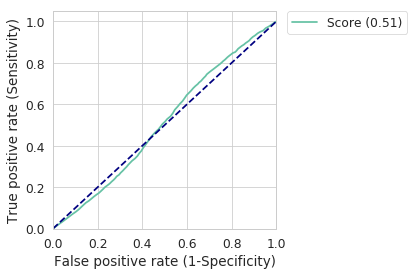

SpearmanrResult(correlation=-0.023607926986625213, pvalue=0.18197039385012695)

In [2]:
import pandas as pd
import sys
import os
root_dir = os.path.abspath(os.path.join(os.getcwd(), "../.."))
os.chdir(root_dir)

import functions

#Datasets
pET = pd.read_pickle('results/pET_complete.pkl.gz', compression='infer')
ecoli_w3110 = pd.read_pickle('results/ecoli.pkl.gz', compression='infer')
pET['Accession'] = pET['Accession'].apply(lambda x:x.split('_')[0])

ccsol_pET21 = pd.read_csv('Testing_other_tools/ccsol/ccSOL_pET21_NESG.txt', sep='\t', header=None)
ccsol_pET15 = pd.read_csv('Testing_other_tools/ccsol/ccSOL_pET15_NESG.txt', sep='\t', header=None)
ccsol_ecoli = pd.read_csv('Testing_other_tools/ccsol/ccSOL_ecoli_W3110_tags.txt', sep='\t', header=None)

#merge pET
ccsol_pET = pd.concat([ccsol_pET15, ccsol_pET21])


#Rename cols
ccsol_pET = ccsol_pET.rename(columns={0:'Accession', 1:'Score'})
ccsol_ecoli = ccsol_ecoli.rename(columns={0:'JW', 1:'Score'})

ccsol_pET.shape, pET.shape, ecoli_w3110.shape, ccsol_ecoli.shape

#merge results with cleaned dataset
df_pET = pET.merge(ccsol_pET, on="Accession")
df_ecoli = ecoli_w3110.merge(ccsol_ecoli, on="JW")


#ROC for pET

df = df_pET[['Score']].copy()

labels = df_pET['Solubility'].values
functions.make_roc(df, labels)

#Correlation for ecoli
from scipy.stats import spearmanr

spearmanr(df_ecoli['Score'], df_ecoli['Solubility(%)'])

In [3]:
df_pET.shape, df_ecoli.shape

((12216, 6), (3198, 6))

In [4]:
#cross validation sets
def compute_auc(df, labels):
    preds = df['Score'].values
    fpr, tpr, _ = functions.roc_curve(labels, preds)
    a = functions.auc(fpr, tpr)
    if a < 0.5:
        a = 1 - a
    return a


cv_10 = pd.read_pickle('results/testing_10_with_tag.pkl')
cv_40 = pd.read_pickle('results/testing_40_with_tag.pkl')
cv_90 = pd.read_pickle('results/testing_90_with_tag.pkl')



In [5]:


all_aucs_test_ccsol_10 = []
for i, v in enumerate(cv_10):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(ccsol_pET, on="Accession")
    temp = v.merge(ccsol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(ccsol_pET, on="Accession")['Solubility'].values
    all_aucs_test_ccsol_10.append(compute_auc(temp, labels))
all_aucs_test_ccsol_10

[0.5463306390117431,
 0.5116813317479192,
 0.5028452802174447,
 0.5072010711540152,
 0.5068962690144043,
 0.5466052639512798,
 0.5146231466293971,
 0.5119611584221384,
 0.5244893873843727,
 0.5181553460290522]

In [6]:
functions.np.mean(all_aucs_test_ccsol_10), functions.np.std(all_aucs_test_ccsol_10)

(0.5190788893561766, 0.014861877551636538)

In [4]:


all_aucs_test_ccsol_40 = []
for i, v in enumerate(cv_40):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(ccsol_pET, on="Accession")
    temp = v.merge(ccsol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(ccsol_pET, on="Accession")['Solubility'].values
    all_aucs_test_ccsol_40.append(compute_auc(temp, labels))
all_aucs_test_ccsol_40

[0.5078347578347578,
 0.5148687350835323,
 0.5040017304780446,
 0.514553334596438,
 0.5110307905790579,
 0.5097728905307986,
 0.5216182725983738,
 0.5157796994123938,
 0.5257592970029068,
 0.5374980056798239]

In [5]:
functions.np.mean(all_aucs_test_ccsol_40), functions.np.std(all_aucs_test_ccsol_40)

(0.5162717513796127, 0.009304597488694668)

In [6]:
all_aucs_test_ccsol_90 = []
for i, v in enumerate(cv_90):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(ccsol_pET, on="Accession")
    temp = v.merge(ccsol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(ccsol_pET, on="Accession")['Solubility'].values
    all_aucs_test_ccsol_90.append(compute_auc(temp, labels))
all_aucs_test_ccsol_90

[0.5001105288885153,
 0.5238120844139084,
 0.5108086543745323,
 0.5177389808416072,
 0.5070260217139042,
 0.5454370300751881,
 0.502968219427041,
 0.5402252762952926,
 0.520281368278226,
 0.5260870942201109]

In [7]:
functions.np.mean(all_aucs_test_ccsol_90), functions.np.std(all_aucs_test_ccsol_90)

(0.5194495258528325, 0.014311980014382122)